### AIDI 1002: Machine Learning Programming — Assignment - 2


Submitted by: Kishan Patel (200527734)

_______________________________________________________________________________________________________________________________

### Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Making CustomerID as the index
df.set_index('CustomerID', inplace= True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
#Dropping duplicates if found any

df.drop_duplicates(inplace=True)

In [8]:
#Converting Genre to numbers

Genre = {'Male': 0, 'Female': 1}
df['Genre'] = df['Genre'].map(Genre)

df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


### 1.1 Measuring the Manhattan Distance and K-means clustering

In [9]:
matrix = df.values # convert dataframe to matrix
matrix

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [10]:
from sklearn.metrics.pairwise import manhattan_distances

man_dist = manhattan_distances(matrix)
man_dist

array([[  0.,  44.,  36., ..., 159., 156., 177.],
       [ 44.,   0.,  78., ..., 129., 196., 133.],
       [ 36.,  78.,   0., ..., 191., 146., 209.],
       ...,
       [159., 129., 191., ...,   0.,  67.,  22.],
       [156., 196., 146., ...,  67.,   0.,  67.],
       [177., 133., 209., ...,  22.,  67.,   0.]])

In [11]:
from sklearn.preprocessing import StandardScaler

std_matrix = StandardScaler().fit_transform(matrix)
std_matrix

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [12]:
man_dist_std = manhattan_distances(std_matrix)
man_dist_std

array([[ 0.        ,  1.77403893,  3.40560503, ...,  6.52852823,
         6.4048901 ,  7.15425262],
       [ 1.77403893,  0.        ,  5.03611058, ...,  5.29799115,
         7.89186227,  5.38021369],
       [ 3.40560503,  5.03611058,  0.        , ...,  9.71426102,
         7.96011734, 10.33998541],
       ...,
       [ 6.52852823,  5.29799115,  9.71426102, ...,  0.        ,
         2.59387112,  0.91279115],
       [ 6.4048901 ,  7.89186227,  7.96011734, ...,  2.59387112,
         0.        ,  2.66693483],
       [ 7.15425262,  5.38021369, 10.33998541, ...,  0.91279115,
         2.66693483,  0.        ]])

In [13]:
import sys 

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit

def PrintDistMat(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

In [14]:
PrintDistMat(man_dist_std)

0.0	1.8	3.4	3.8	3.0	3.7	4.6	4.6	4.8	4.2	4.6	5.6	5.9	4.0	2.5	2.0	3.5	1.3	3.1	5.8	1.6	2.1	5.7	2.6	6.0	2.9	4.6	2.5	4.4	4.7	4.9	4.1	4.5	2.8	5.8	4.5	5.2	4.8	4.6	4.3	6.3	3.3	3.1	4.6	5.5	4.3	5.8	3.9	3.8	3.9	5.7	2.9	4.5	4.8	5.5	3.2	5.8	5.0	4.2	3.9	5.5	1.8	7.2	6.5	4.9	2.1	5.4	7.1	2.0	4.5	5.6	5.4	6.7	7.0	4.7	2.6	5.9	3.3	4.3	5.8	4.7	3.5	5.0	5.6	4.3	3.8	6.9	4.5	5.5	6.2	7.8	1.8	4.2	5.3	4.8	2.6	6.1	4.7	4.0	2.2	4.2	6.3	6.0	2.9	4.6	4.1	7.6	4.6	5.5	5.6	5.6	4.4	5.4	2.1	4.3	4.4	7.2	6.9	6.5	6.9	3.2	5.4	6.3	5.5	4.8	6.5	4.0	5.8	6.1	4.9	5.3	5.0	4.8	6.3	3.6	6.8	7.3	4.5	3.4	6.7	8.4	5.3	5.0	7.1	3.8	5.3	4.6	6.7	6.2	5.5	5.0	5.7	7.0	7.2	7.3	6.9	5.2	6.7	5.0	6.5	7.3	6.9	3.8	7.5	5.4	7.3	5.1	7.9	6.4	4.6	5.3	4.8	5.1	6.0	8.2	7.4	6.5	4.5	6.8	6.1	6.7	7.9	6.0	7.8	6.8	6.2	8.4	5.1	7.8	8.4	7.1	7.5	5.9	9.1	8.9	8.7	8.5	6.5	6.4	7.2	
1.8	0.0	5.0	2.4	4.4	2.4	6.0	2.8	6.3	3.2	6.1	3.9	7.4	2.6	4.0	0.3	5.0	0.9	4.5	4.0	3.1	0.9	7.1	1.4	7.5	1.1	6.1	2.3	5.9	2.9	6.4	2.9	6.0	1.3	7.3	2.7	6.7	3.7	6.1	3.2	7.8	1.5	4.6	4.4	7.0	3.8	6.1	4.7	5.1	5.2

In [15]:
df1= df.copy()

In [16]:
from sklearn.preprocessing import StandardScaler

df_columns = df1.columns
features = df1[df_columns]

std = StandardScaler().fit(features.values)
std_features = std.transform(features.values)
norm_df = pd.DataFrame(std_features, columns = df_columns)
norm_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [17]:
# Let's find out the optimal numbers of clusters using elbow method.

In [18]:
#using Age, Annual Income, and Spending Score 

X = norm_df.iloc[:, 1:]

In [19]:
from sklearn.cluster import KMeans

wcss = [] #Within-Cluster Sum of Square
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


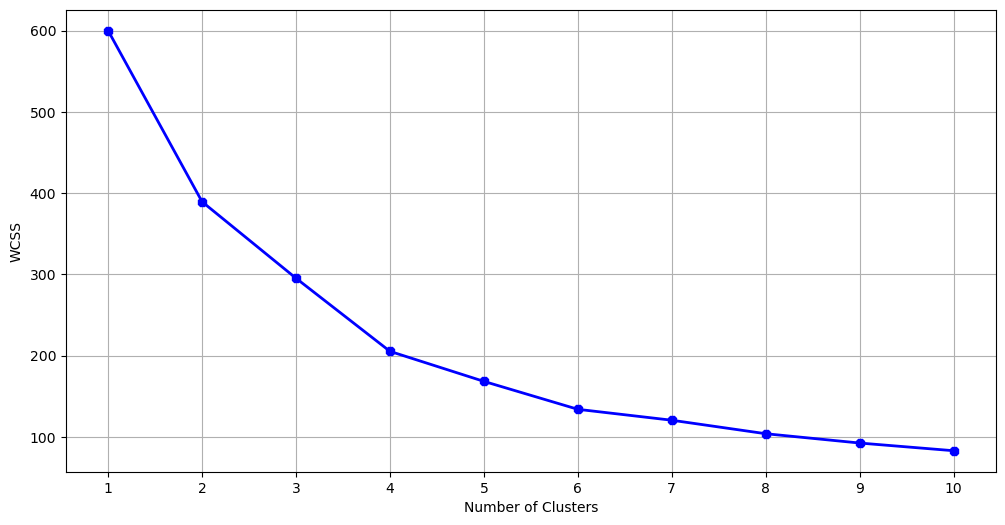

In [20]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(K,wcss, linewidth=2, color="Blue", marker ="8")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the graph drawn above, we can infere that the optimal number of clusters are 5, therefore, we will use K=5.

In [21]:
kmeans = KMeans(n_clusters = 5,random_state = 0)
y_means = kmeans.fit_predict(X) #used X instead of matrix to reduce the complexity to plot multidimentional array.

norm_df["label"] = y_means


<IPython.core.display.Javascript object>


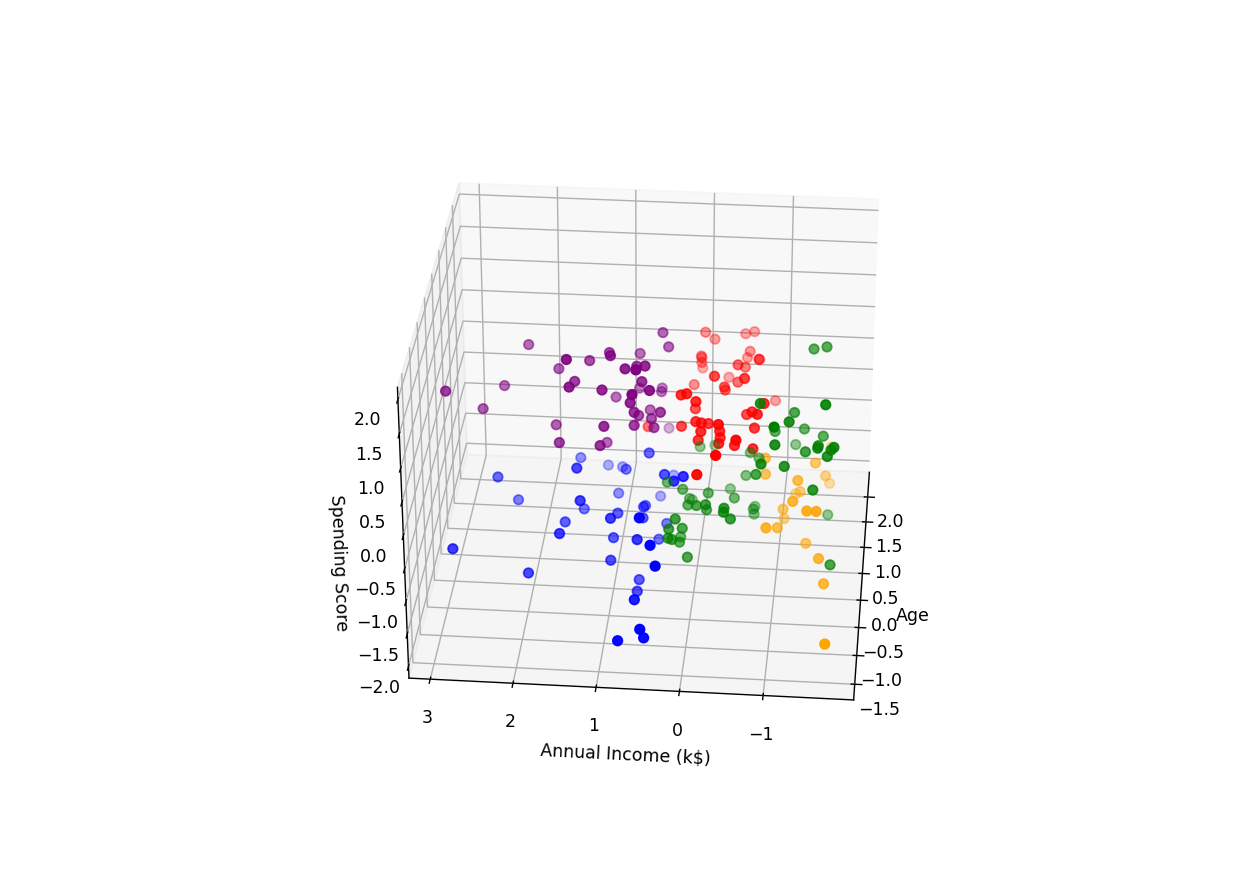

In [22]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(norm_df.Age[norm_df.label == 0], norm_df["Annual_Income_(k$)"][norm_df.label == 0], norm_df["Spending_Score"][norm_df.label == 0], c='blue', s=30)
ax.scatter(norm_df.Age[norm_df.label == 1], norm_df["Annual_Income_(k$)"][norm_df.label == 1], norm_df["Spending_Score"][norm_df.label == 1], c='red', s=30)
ax.scatter(norm_df.Age[norm_df.label == 2], norm_df["Annual_Income_(k$)"][norm_df.label == 2], norm_df["Spending_Score"][norm_df.label == 2], c='green', s=30)
ax.scatter(norm_df.Age[norm_df.label == 3], norm_df["Annual_Income_(k$)"][norm_df.label == 3], norm_df["Spending_Score"][norm_df.label == 3], c='orange', s=30)
ax.scatter(norm_df.Age[norm_df.label == 4], norm_df["Annual_Income_(k$)"][norm_df.label == 4], norm_df["Spending_Score"][norm_df.label == 4], c='purple', s=30)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score')
plt.show()

In [23]:
import sklearn

km = sklearn.cluster.KMeans(n_clusters=5, init='random', n_init=1, verbose=0)
km.fit(matrix)

KMeans(init='random', n_clusters=5, n_init=1)

In [24]:
# Get cluster assignment labels
labels = km.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [25]:
results = pd.DataFrame([df.index,labels]).T
results

,0,1
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
195,196,3
196,197,2
197,198,3
198,199,2


### 1.2 Adding a seperate column containing cluster numbers 

In [26]:
df["labels"] = labels
df

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
1,0,19,15,39,0
2,0,21,15,81,1
3,1,20,16,6,0
4,1,23,16,77,1
5,1,31,17,40,0
...,...,...,...,...,...
196,1,35,120,79,3
197,1,45,126,28,2
198,0,32,126,74,3


#### Comments on Homogeneity

In [27]:
df[df["labels"]==0]

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
1,0,19,15,39,0
3,1,20,16,6,0
5,1,31,17,40,0
7,1,35,18,6,0
9,0,64,19,3,0
11,0,67,19,14,0
13,1,58,20,15,0
15,0,37,20,13,0
17,1,35,21,35,0


The data points which are clustered in the cluster 0 shows below-mentioned characterstics:

- Young age group, having low income and high spendings

In [28]:
df[df["labels"]==1]

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
2,0,21,15,81,1
4,1,23,16,77,1
6,1,22,17,76,1
8,1,23,18,94,1
10,1,30,19,72,1
12,1,35,19,99,1
14,1,24,20,77,1
16,0,22,20,79,1
18,0,20,21,66,1


The data points which are clustered in the cluster 1 shows below-mentioned characterstics:

- Mid-aged group, having low income and low spendings

In [29]:
df[df["labels"]==2]

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
125,1,23,70,29,2
129,0,59,71,11,2
131,0,47,71,9,2
133,1,25,72,34,2
135,0,20,73,5,2
137,1,44,73,7,2
139,0,19,74,10,2
141,1,57,75,5,2
143,1,28,76,40,2


The data points which are clustered in the cluster 2 shows below-mentioned characterstics:

- People in their late 30s and early 40s, having high income and high spendings

In [30]:
df[df["labels"]==3]

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
124,0,39,69,91,3
126,1,31,70,77,3
128,0,40,71,95,3
130,0,38,71,75,3
132,0,39,71,75,3
134,1,31,72,71,3
136,1,29,73,88,3
138,0,32,73,73,3
140,1,35,74,72,3


The data points which are clustered in the cluster 3 shows below-mentioned characterstics:

- Mixed-aged group, having balanced income and spendings

In [31]:
df[df["labels"]==4]

,Genre,Age,Annual_Income_(k$),Spending_Score,labels
CustomerID,,,,,
41,1,65,38,35,4
47,1,50,40,55,4
51,1,49,42,52,4
54,0,59,43,60,4
55,1,50,43,45,4
56,0,47,43,41,4
57,1,51,44,50,4
58,0,69,44,46,4
60,0,53,46,46,4


The data points which are clustered in the cluster 4 shows below-mentioned characterstics:

- Mix-aged group, having high income and low spendings

### 1.3 Performing different classification algorithms

In [32]:
x=df.drop(columns = ['labels'])
y=df.labels

In [33]:
#Splitting the dataset into the train and test set.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
#Feature Scaling of the dataset using StandardScalar 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Logistic Regression and Naive Bayes are sensitive to the variance in the dataset, therefore we will use scaled features for these classifiers. Whereas decision tree and Random forest are not sensitive to the variance in the dataset, therefore we will use normal features which are not scaled.

#### Logistic Regression

In [35]:
#Linear Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

#Predicting Test Set Results
y_pred = lr.predict(x_test)

In [36]:
accuracy_lr = format(lr.score(x_test, y_test))
print('Accuracy of Logistic Regression:',str(accuracy_lr))

Accuracy of Logistic Regression: 0.9833333333333333


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         9
           4       1.00      0.94      0.97        17

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



#### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_pred_test = gnb.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_gnb= format(accuracy_score(y_test,gnb_pred_test))

print('Accuracy of Naive Bayes:', str(accuracy_gnb))

Accuracy of Naive Bayes: 0.9833333333333333


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         9
           4       1.00      0.94      0.97        17

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



#### Decision Tree Classifier

In [41]:
#Splitting the dataset into the train and test set.

from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y, test_size=0.3, random_state=42)


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(x_train1, y_train1)

dt_pred_test = dt.predict(x_test1)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_dt = format(accuracy_score(y_test1, dt_pred_test))
print('Accuracy of Decision Tree:',str(accuracy_dt))

Accuracy of Decision Tree: 0.95


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, dt_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14
           3       0.90      1.00      0.95         9
           4       0.94      0.88      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.96        60
weighted avg       0.95      0.95      0.95        60



#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(x_train1, y_train1)

rfc_pred_test = rfc.predict(x_test1)

In [46]:
accuracy_rfc = format(accuracy_score(y_test1, rfc_pred_test))
print('Accuracy of Random Forest:',str(accuracy_rfc))

Accuracy of Random Forest: 0.9666666666666667


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, rfc_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       0.93      1.00      0.97        14
           3       0.90      1.00      0.95         9
           4       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.97      0.98      0.97        60
weighted avg       0.97      0.97      0.97        60



### 1.4 Comparison of the performance of different Classifier

In [48]:
print("The accuracy of Logistic Regression:", accuracy_lr)
print("The accuracy of Naive Bayes:", accuracy_gnb)
print("The accuracy of Decision Tree:", accuracy_dt)
print("The accuracy of Random Forest:", accuracy_rfc)

The accuracy of Logistic Regression: 0.9833333333333333
The accuracy of Naive Bayes: 0.9833333333333333
The accuracy of Decision Tree: 0.95
The accuracy of Random Forest: 0.9666666666666667


As we can see from the results that the labels we created using clusters are significantly relevent. The supervised algorithms for classification we used are Logistic regression, decision tree, random forest, and naive bayes, out of which logistic regression, naive bayes and random forest seem better in terms of accuracy. We can also notice from the evaluation metrics that logistic regression, naive bayes and random forest seem to give better performance. 

### Question : 2

#### 2.1 Importing the breast_cancer dataset

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint as p

In [50]:
cancer = load_breast_cancer(as_frame=1)

In [51]:
target_names = cancer.target_names

In [52]:
cancer = pd.DataFrame(cancer.frame)

In [53]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [54]:
cancer.shape

(569, 31)

In [55]:
cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [56]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [57]:
cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

#### 2.2 Performing PCA (2 components) and LDA (1 Component)

In [58]:
X=cancer.drop(columns='target')
y= cancer.target

In [59]:
#Feature Scaling using Standard Scaler

sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [60]:
#Performing PCA for 2 components

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

In [61]:
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [62]:
#Performing LDA for 1 Component

model = LDA (n_components=1)
model.fit(X_std, y)

LinearDiscriminantAnalysis(n_components=1)

In [63]:
data_plot = model.fit(X_std, y).transform(X_std)

lda_df = pd.DataFrame(data = data_plot, columns = ['LDA Component 1'])
lda_df.head()

,LDA Component 1
0,3.323927
1,2.319108
2,3.747425
3,4.048549
4,2.281158


#### 2.3 Visualising the components

<IPython.core.display.Javascript object>


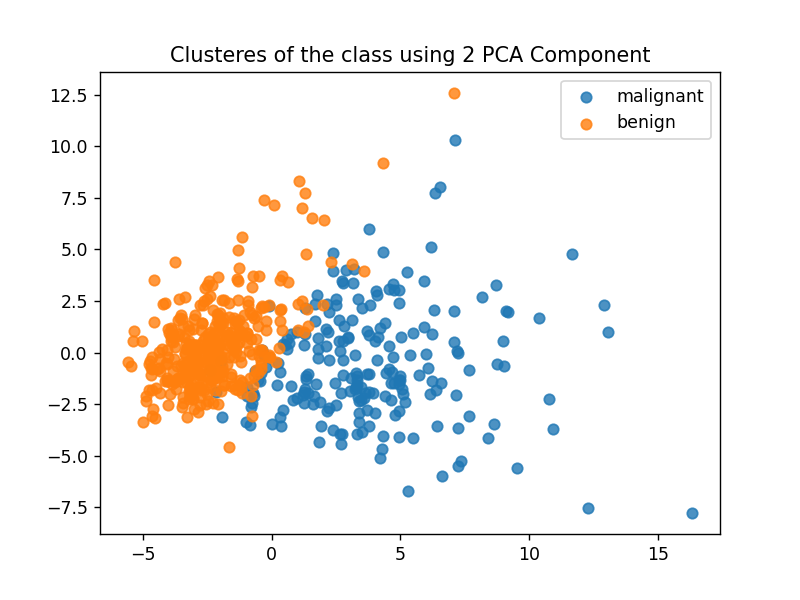

In [64]:
#Visualizing PCA Components

plt.figure()

for color, i, target_names in zip(['red', 'green'], [0, 1], ['malignant', 'benign']):

    plt.scatter(principalComponents[y == i, 0], principalComponents[y == i, 1], label=target_names, alpha=.8, cmap='rainbow')

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Clusteres of the class using 2 PCA Component')

plt.show()

We can see that in PCA, using 2 components, some data points from both the class are overlapping, but we can clearly state the difference between them and see proper segregation.

<IPython.core.display.Javascript object>


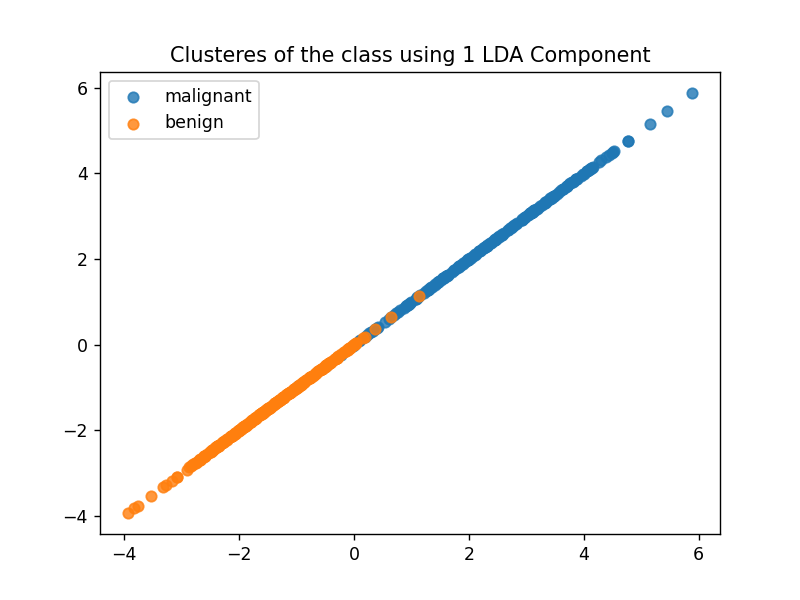

In [65]:
#Plotting LDA Components

plt.figure()

for color, i, target_names in zip(['red', 'green'], [0, 1], ['malignant', 'benign']):

    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 0], label=target_names, alpha=.8, cmap='rainbow')

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Clusteres of the class using 1 LDA Component')

plt.show()

It is not possible to draw a scattered plot using only 1 component, therefore in LDA, I used the component on both the axes and see if the class is segregating. And we can see some datapoints are getting overlapped, yet having clear segregation of classes.

#### 2.4 Variance explained by components using PCA and LDA

In [66]:
pca_2=PCA(n_components=2).fit(X_std)

print("Explained variance is:",pca_2.explained_variance_)
print("Explained variance ratio",pca_2.explained_variance_ratio_)

Explained variance is: [13.30499079  5.7013746 ]
Explained variance ratio [0.44272026 0.18971182]


From the results given above, we can see that the maximum vairance explained by PCA component is 13.30 (44.27%)

In [67]:
lda_1=LDA(n_components=1).fit(X_std,y)

print("Explained variance ratio",lda_1.explained_variance_ratio_)

Explained variance ratio [1.]


From the results given above, we can see that the maximum vairance explained by LDA component is 100%

In order to compare PCA and LDA based on the variance, the number of components should be the same, but in our case we are having 2 components in PCA and 1 component in LDA, therefore we will use those components to build the supervised learning model and we will compare the accuracy of the model to evaluate which one is better PCA or LDA. 

#### 2.5 Comparison of working PCA and LDA to choose the best one 

##### Evaluating model accuracy using 2 PCA Components

In [68]:
X = cancer.drop(columns='target').values
y= cancer.target.values

In [69]:
#Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [70]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
#Performing PCA on 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [72]:
#training using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [73]:
#predicting 
y_pred = rf.predict(X_test)

#finding accuracy
print('Accuracy of model made using 2 PCA components '+ str(accuracy_score(y_test, y_pred)))

Accuracy of model made using 2 PCA components 0.9035087719298246


##### Evaluating model accuracy using 1 LDA Component

In [74]:
#performing LDA with 1 component
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [75]:
#training using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_lda = RandomForestClassifier(max_depth = 2, random_state = 0)
rf_lda.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [76]:
#prediction for testing
y_pred = rf_lda.predict(X_test)

print('Accuracy using 1 component LDA ' + str(accuracy_score(y_test, y_pred)))

Accuracy using 1 component LDA 0.9122807017543859


###### We can clearly notice the differrence that LDA outweighs PCA in terms of accuracy, giving accuracy of 90.35% and 91.22% respectively

#### Conclusion
    
    PCA does not primarily focus on the label in the dataset, instead it aims for the highest variance. In a feature collection with a high cardinality, there is a chance of duplicate features, which would increase processing time, and increase unnecessary model complexity. In order to build a new feature set with the least degree of correlation between them, or to put it another way, a feature set with high variance between them, PCA must first identify these highly correlated characteristics and derive optimal components, having the same information with reduced dimensions.

    On the other hand, LDA seeks to identify the boundary that encircles each class cluster. The data points are reprojected to a new dimension in such a way that the clusters can be formed as distinct as possible and the individual components within a class are closer to the centroid.